In [1]:
from mypgm.base import Factor, CPD, RandomVar
from mypgm.exacted import ExpectedUtility, ArcInversion, random_decision
from mypgm.pgms import InfluenceDiagram

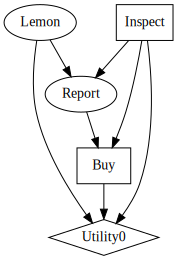

In [6]:
L = RandomVar('Lemon', 2) # y/n
R = RandomVar('Report', 3)  # good, bad, none

I = RandomVar('Inspect', 2) # y/n
B = RandomVar('Buy', 2) # y/n

cL = CPD([L], [0.5, 0.5])
dI = Factor([I], mod='decision')
dB_RI = Factor([B, R, I], mod='decision')
#cR_IL = CPD([R, I, L], [0.18, 0.89, 0, 0, 0.82, 0.11, 0, 0, 0, 0, 1, 1])
cR_IL = CPD([R, I, L], [0.2, 0.9, 0, 0, 0.8, 0.1, 0, 0, 0, 0, 1, 1])
uBL = Factor([B, L, I], [-650, -600, 950, 1000, -350, -300, -350, -300], mod='utility')
#uBL = Factor([B, L], [-600, 1000, -300, -300])
#uI = Factor([I], [-50, 0])

car = InfluenceDiagram([cL, cR_IL], [uBL], [dI, dB_RI])
car.viz()

In [5]:
ai.find_node_no_ds(car)

['u0', Report]


Lemon

In [8]:
uBL.to_dataframe()

,"Lemon=0,Inspect=0","Lemon=0,Inspect=1","Lemon=1,Inspect=0","Lemon=1,Inspect=1"
Buy,,,,
0,-650,-600,950,1000
1,-350,-300,-350,-300


In [14]:
eu = ExpectedUtility(car)

#print(eu.optimal_decision_rule([T]))
#a = random_decision(dI)
a = Factor([I], [1, 0], mod='decision')
b = random_decision(dB_RI)

print(eu.expected_utility([a, b]))

a.to_dataframe()

150.0


,
Inspect,
0,1
1,0


Max EU at iteration 0: 200.0
Starting simulation...
Max EU at the end: 205.0
End simulation: time spend = 0.19373798370361328
Best: [0, 0, 1, 0, 1, 0, 1]
Optimal strategy: [Inspect 
(0,) -> 0
(1,) -> 1
, Buy Report Inspect 
(0, 0, 0) -> 0
(0, 0, 1) -> 1
(0, 1, 0) -> 0
(0, 1, 1) -> 1
(0, 2, 0) -> 0
(0, 2, 1) -> 1
(1, 0, 0) -> 1
(1, 0, 1) -> 0
(1, 1, 0) -> 1
(1, 1, 1) -> 0
(1, 2, 0) -> 1
(1, 2, 1) -> 0
]


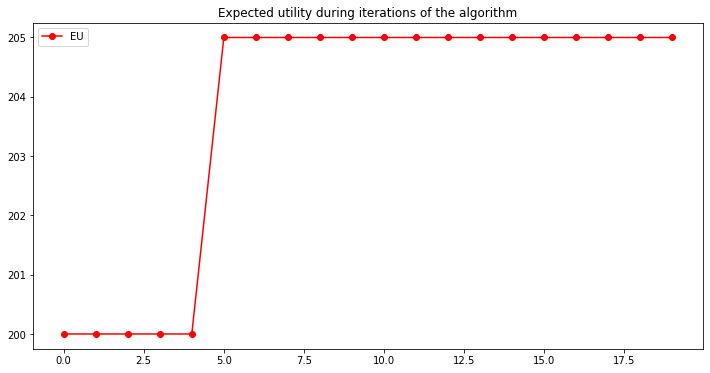

In [19]:
from mypgm.approximated import heuristicID

h = heuristicID(car, [dI, dB_RI])
h.run_algorithm(max_epochs = 20, mut=0.9, population_size = 2, crossp=0.8)

In [7]:
ai1 = ArcInversion(car)
ai1.solve()

Regular ID
Start:
Chance node to remove: None
Decision node to remove: None
[Buy]
['u0', Report]
Node to reverse: Lemon
Arc reversed for: Lemon
Removed node: Lemon
Chance node to remove: None
Decision node to remove: Buy
Removed decision node: Buy
Chance node to remove: Report
Removed chance node: Report
Chance node to remove: None
Decision node to remove: Inspect
Removed decision node: Inspect


(<mypgm.pgms.InfluenceDiagram at 0x132212c90>, [Buy Report Inspect 
  (0, 0, 0) -> 1.0
  (0, 0, 1) -> 1.0
  (0, 1, 0) -> 0.0
  (0, 1, 1) -> 1.0
  (0, 2, 0) -> 1.0
  (0, 2, 1) -> 1.0
  (1, 0, 0) -> 0.0
  (1, 0, 1) -> 0.0
  (1, 1, 0) -> 1.0
  (1, 1, 1) -> 0.0
  (1, 2, 0) -> 0.0
  (1, 2, 1) -> 0.0, Inspect 
  (0,) -> 1.0
  (1,) -> 0.0], [Inspect 
  (0,) -> 204.99999999999997
  (1,) -> 200.0])

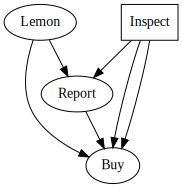

In [4]:
ai.update_id().viz()

In [14]:
eu = ExpectedUtility(car)

In [16]:
ai1.decisions[1]

Inspect 
(0,) -> 1.0
(1,) -> 0.0

In [17]:
eu.expected_utility([ai1.decisions[0], ai1.decisions[1]])

205.0